In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
#read the data from the dataframe
data = pd.read_excel("data naker.xlsx")
data

In [3]:
# Cek nilai kosong pada masing-masing fitur atau variabel
missing_values = data.isnull().sum()

# Tampilkan jumlah nilai kosong untuk setiap fitur
print("Jumlah nilai kosong untuk setiap fitur:")
print(missing_values)

Jumlah nilai kosong untuk setiap fitur:
NO                         0
NIK(KTP)                   9
SURABAYA/NON_SURABAYA     36
NAMA                       8
NAMA_PERUSAHAAN            0
ALAMAT_PERUSAHAAN          0
NIB                      237
L / P                     15
USIA                     300
PEND                     191
JURUSAN                  466
ALAMAT (KTP)              88
KECAMATAN                114
KELURAHAN                194
NO_TLPN                  399
GAJI/UPAH                541
SURVEY_BULAN              16
JABATAN                  279
dtype: int64


In [4]:
# Hitung persentase nilai kosong untuk setiap fitur atau variabel
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Tampilkan persentase nilai kosong untuk setiap fitur
print("Persentase nilai kosong untuk setiap fitur:")
print(missing_percentage)

Persentase nilai kosong untuk setiap fitur:
NO                        0.000000
NIK(KTP)                  0.948367
SURABAYA/NON_SURABAYA     3.793467
NAMA                      0.842993
NAMA_PERUSAHAAN           0.000000
ALAMAT_PERUSAHAAN         0.000000
NIB                      24.973656
L / P                     1.580611
USIA                     31.612223
PEND                     20.126449
JURUSAN                  49.104320
ALAMAT (KTP)              9.272919
KECAMATAN                12.012645
KELURAHAN                20.442571
NO_TLPN                  42.044257
GAJI/UPAH                57.007376
SURVEY_BULAN              1.685985
JABATAN                  29.399368
dtype: float64


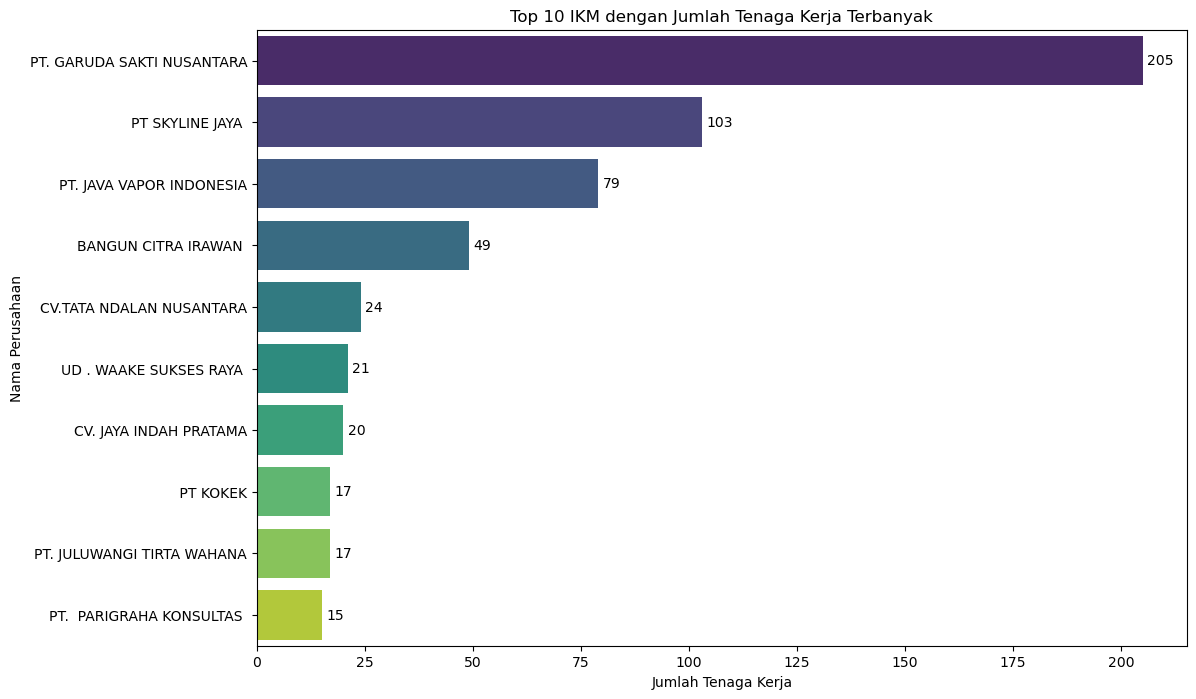

In [5]:
# Mengelompokkan data berdasarkan 'NAMA_PERUSAHAAN' dan menghitung jumlah tenaga kerja
jumlah_tenaga_kerja_perusahaan = data.groupby('NAMA_PERUSAHAAN').size().reset_index(name='jumlah_tenaga_kerja')
# Mengurutkan hasil pengelompokan berdasarkan jumlah tenaga kerja dan memilih 10 perusahaan teratas
top_10_perusahaan = jumlah_tenaga_kerja_perusahaan.sort_values(by='jumlah_tenaga_kerja', ascending=False).head(10)
# Membuat visualisasi menggunakan seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='jumlah_tenaga_kerja', y='NAMA_PERUSAHAAN', data=top_10_perusahaan, palette='viridis')
# Menambahkan nilai di samping batang
for index, value in enumerate(top_10_perusahaan['jumlah_tenaga_kerja']):
    bar_plot.text(value + 1, index, str(value), color='black', ha="left", va="center")
plt.title('Top 10 IKM dengan Jumlah Tenaga Kerja Terbanyak')
plt.xlabel('Jumlah Tenaga Kerja')
plt.ylabel('Nama Perusahaan')
plt.show()

In [6]:
# Statistik Ringkasan
summary_statistics = data.describe()
print(summary_statistics)

               NO        USIA     GAJI/UPAH
count  949.000000  649.000000  4.080000e+02
mean   475.000000   35.929122  4.221934e+06
std    274.097002   11.430732  2.242008e+06
min      1.000000   17.000000  1.600000e+06
25%    238.000000   26.000000  3.165876e+06
50%    475.000000   33.000000  4.375479e+06
75%    712.000000   45.000000  4.525479e+06
max    949.000000   72.000000  2.750000e+07


In [7]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data['PEND'].unique()
unique_values 

array(['S1', 'SLTP', 'SD', 'SLTA', 'D3', 'D2', 'S2', nan, 'D1', 'D4'],
      dtype=object)

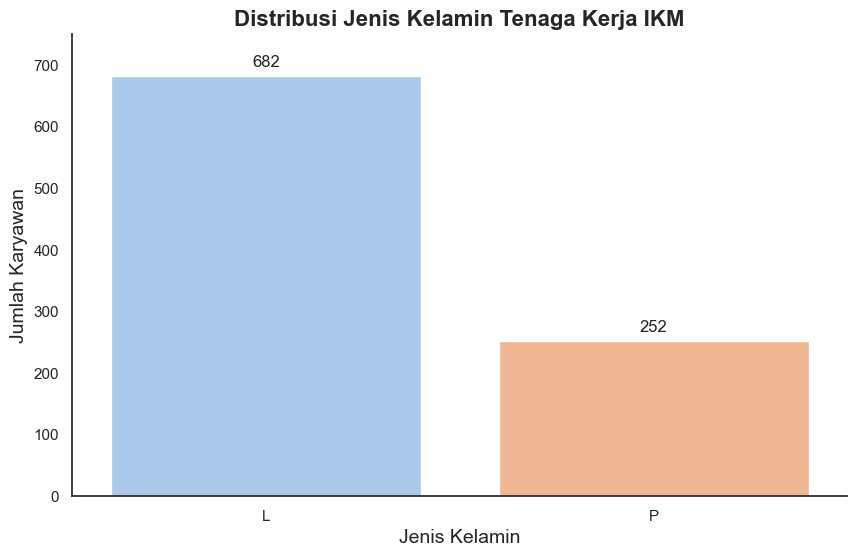

In [8]:
# Mengubah ukuran plot dan gaya
plt.figure(figsize=(10, 6))
sns.set(style="white")

# Membuat countplot dengan palet warna yang lebih modern
ax = sns.countplot(x='L / P', data=data, palette='pastel')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Jenis Kelamin Tenaga Kerja IKM', fontsize=16, fontweight='bold')
plt.xlabel('Jenis Kelamin', fontsize=14)
plt.ylabel('Jumlah Karyawan', fontsize=14)

# Menambahkan nilai di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

# Mengatur batas atas y untuk memberikan ruang bagi nilai
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Menghilangkan garis-garis latar belakang
sns.despine()

# Menampilkan plot
plt.show()

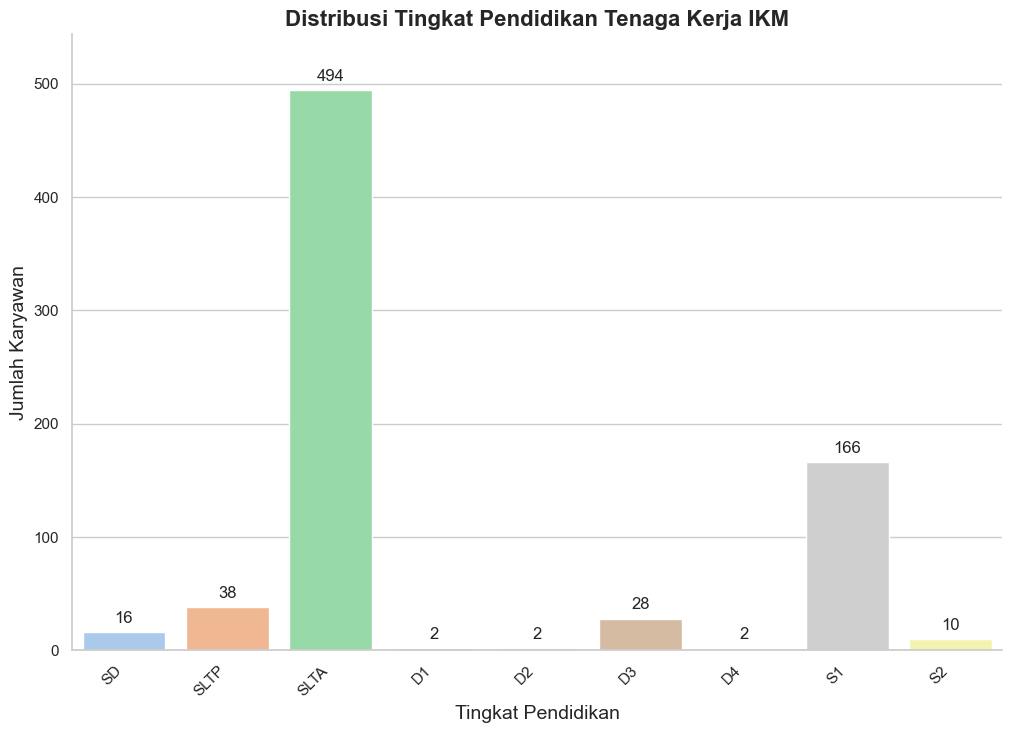

In [9]:
# Mengatur urutan kategori tingkat pendidikan
pendidikan_order = ['SD', 'SLTP', 'SLTA', 'D1', 'D2', 'D3', 'D4' , 'S1', 'S2']

# Mengubah ukuran plot dan gaya
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Membuat countplot dengan palet warna yang lebih modern dan urutan kategori yang telah ditentukan
ax = sns.countplot(x='PEND', data=data, order=pendidikan_order, palette='pastel')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Tingkat Pendidikan Tenaga Kerja IKM', fontsize=16, fontweight='bold')
plt.xlabel('Tingkat Pendidikan', fontsize=14)
plt.ylabel('Jumlah Karyawan', fontsize=14)

# Memutar label x agar tidak bertabrakan
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=12)

# Mengatur batas atas y untuk memberikan ruang bagi nilai
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Menghilangkan garis-garis latar belakang
sns.despine()

# Menampilkan plot
plt.show()

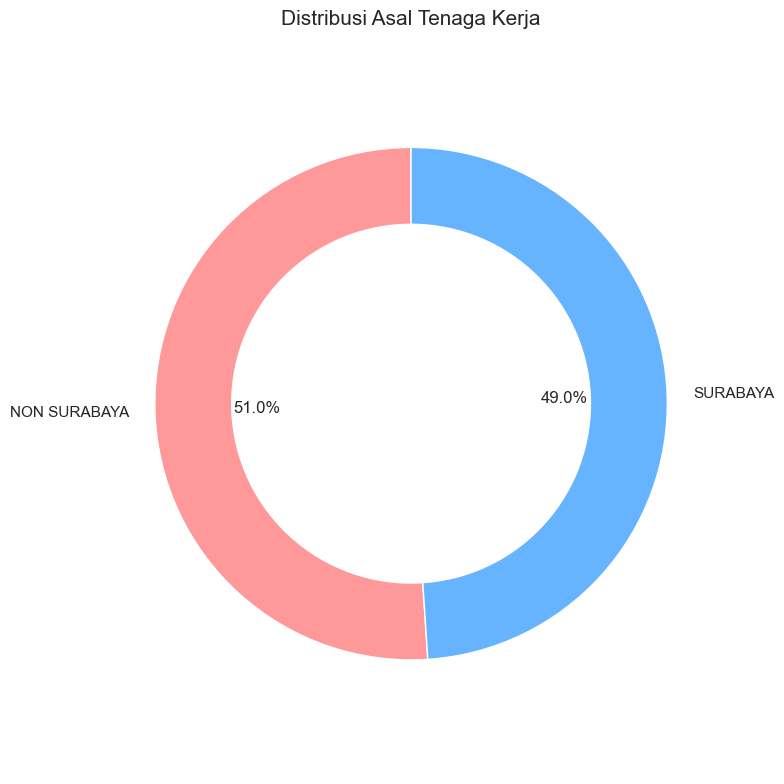

In [10]:
import matplotlib.pyplot as plt

# Data
surabaya_count = data['SURABAYA/NON_SURABAYA'].value_counts()

# Warna yang lebih menonjol
colors = ['#ff9999','#66b3ff']

# Membuat plot
plt.figure(figsize=(8, 8))
plt.pie(surabaya_count, labels=surabaya_count.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=False)

# Menambahkan lingkaran tengah putih
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menambahkan judul
plt.title('Distribusi Asal Tenaga Kerja', fontsize=15)

# Menampilkan plot
plt.axis('equal')
plt.tight_layout()
plt.show()

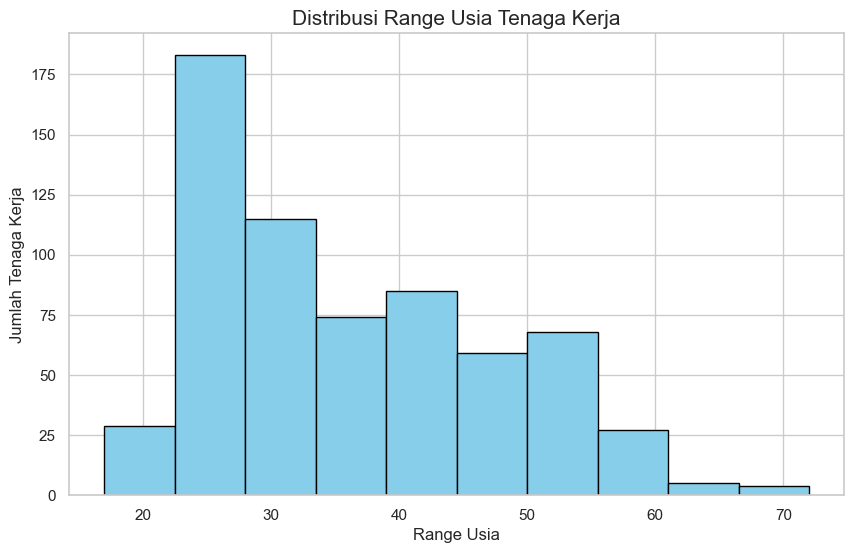

In [11]:
import matplotlib.pyplot as plt

# Membuat histogram untuk range usia
plt.figure(figsize=(10, 6))
plt.hist(data['USIA'], bins=10, color='skyblue', edgecolor='black')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Range Usia Tenaga Kerja', fontsize=15)
plt.xlabel('Range Usia', fontsize=12)
plt.ylabel('Jumlah Tenaga Kerja', fontsize=12)

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

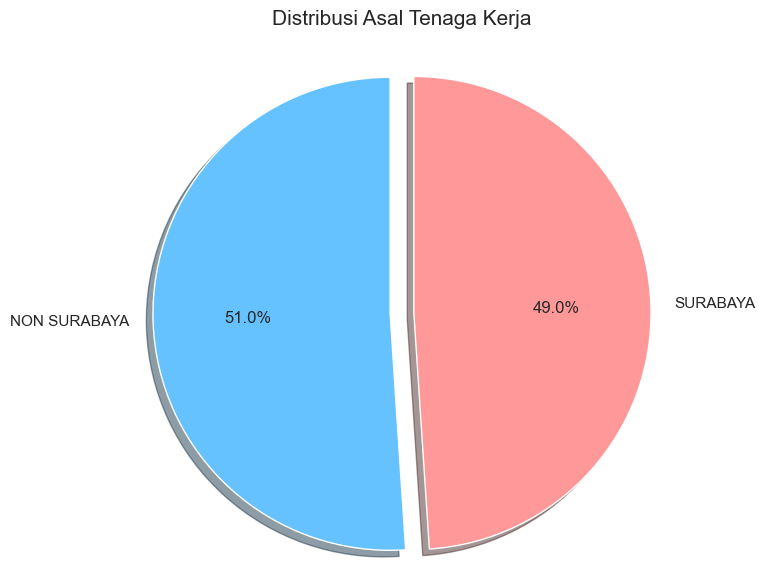

In [12]:
import matplotlib.pyplot as plt

# Data
surabaya_count = data['SURABAYA/NON_SURABAYA'].value_counts()

# Warna yang lebih menarik
colors = ['#66c2ff', '#ff9999']

# Explode
explode = (0.1, 0) 

# Membuat plot
plt.figure(figsize=(8, 6))
plt.pie(surabaya_count, labels=surabaya_count.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

# Menambahkan judul dengan jarak yang lebih jauh
plt.title('Distribusi Asal Tenaga Kerja', fontsize=15, pad=20)

# Menampilkan plot
plt.axis('equal')
plt.tight_layout()
plt.show()

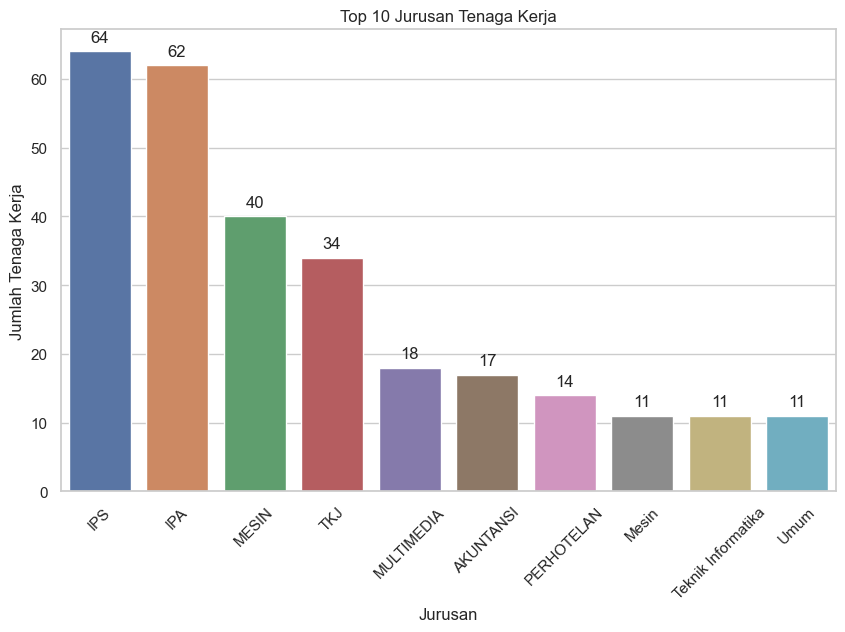

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 10 jurusan teratas
top_10_jurusan = data['JURUSAN'].value_counts().head(10).index

# Filter data untuk hanya menyertakan 10 jurusan teratas
data_top_10_jurusan = data[data['JURUSAN'].isin(top_10_jurusan)]

# Plot distribusi 10 jurusan teratas
plt.figure(figsize=(10, 6))
sns.countplot(x='JURUSAN', data=data_top_10_jurusan, order=top_10_jurusan)
plt.title('Top 10 Jurusan Tenaga Kerja')
plt.xlabel('Jurusan')
plt.ylabel('Jumlah Tenaga Kerja')
plt.xticks(rotation=45)

# Menambahkan nilai di atas setiap batang diagram
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

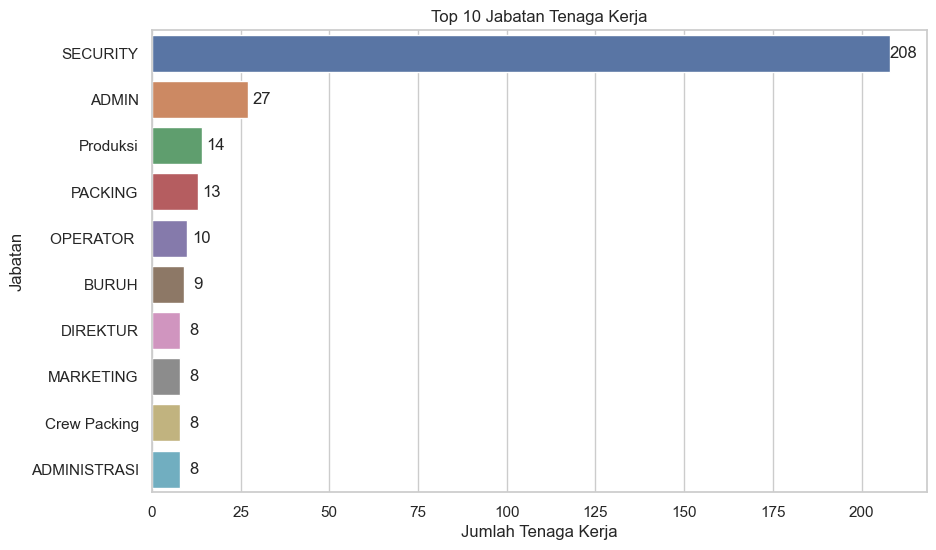

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 10 jabatan teratas
top_10_jabatan = data['JABATAN'].value_counts().head(10).index

# Filter data untuk hanya menyertakan 10 jabatan teratas
data_top_10_jabatan = data[data['JABATAN'].isin(top_10_jabatan)]

# Plot distribusi 10 jabatan teratas
plt.figure(figsize=(10, 6))
sns.countplot(y='JABATAN', data=data_top_10_jabatan, order=top_10_jabatan)
plt.title('Top 10 Jabatan Tenaga Kerja')
plt.xlabel('Jumlah Tenaga Kerja')
plt.ylabel('Jabatan')

# Menambahkan nilai di sebelah kanan setiap batang diagram
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=12)

plt.show()

In [ ]:
data.head(5)

In [ ]:
# Menghapus baris dengan nilai NaN pada kolom 'GAJI/UPAH'
data1 = data.dropna(subset=['GAJI/UPAH'])
data1

In [17]:
unique_values = data['GAJI/UPAH'].unique()
unique_values 

array([ 4500000.,       nan,  2000000.,  2800000.,  1600000.,  2500000.,
        1800000.,  2900000.,  3200000.,  3000000.,  4230000.,  4525479.,
        3500000.,  4000000.,  3872000.,  2250000.,  4525480.,  5000000.,
       27500000., 21000000., 16000000.,  6900000.,  5400000.,  6000000.,
        4300000.,  5150000.,  3300000.,  3870000.,  3700000.,  1958169.,
        4515133.,  3394513.,  2158844.,  2480988.,  2153062.,  2187506.,
        2279568.,  2190216.,  3289199.,  2854095.,  4504787.,  3165876.,
        3583312.,  4375479.,  7500000., 15000000., 12000000.,  2760000.,
        3110000.,  4060000.,  3560000.,  3625000.,  4275000.,  3990000.,
        3140000.,  4375000.,  4170000.,  3621000.,  6080000.,  4727000.,
        8000000.,  4987000.,  4725479.])

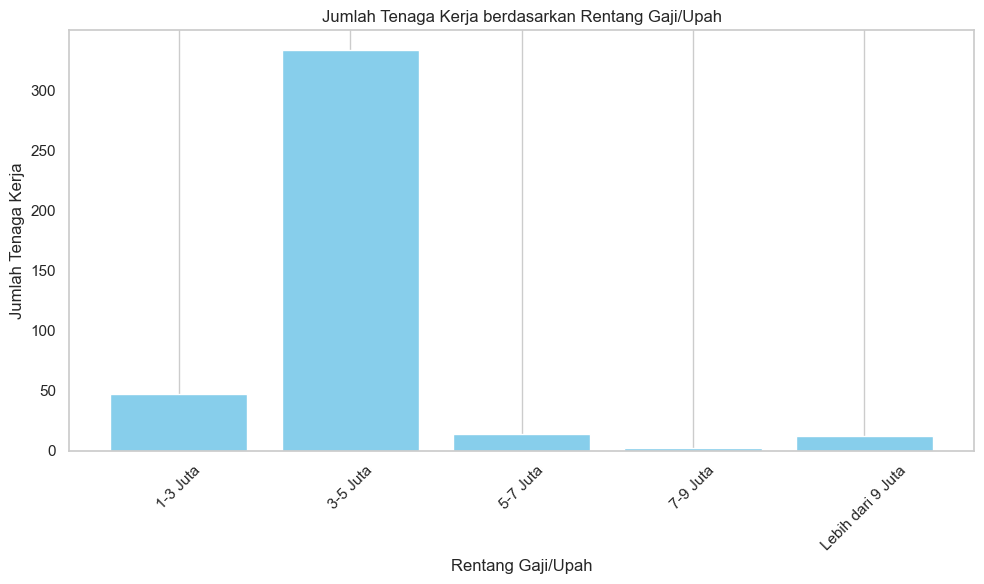

In [18]:
# Definisikan rentang gaji
bins = [1000000, 3000000, 5000000, 7000000, 9000000, float('inf')]
labels = ['1-3 Juta', '3-5 Juta', '5-7 Juta', '7-9 Juta', 'Lebih dari 9 Juta']

# Kelompokkan data berdasarkan nilai gaji/upah dan hitung jumlah tenaga kerja
count_gaji = data1['GAJI/UPAH'].astype(float)
count_gaji = pd.cut(count_gaji, bins=bins, labels=labels, right=False).value_counts().sort_index()

# Visualisasikan data menggunakan diagram batang
plt.figure(figsize=(10, 6))
plt.bar(count_gaji.index.astype(str), count_gaji.values, color='skyblue')

# Tambahkan judul dan label sumbu
plt.title('Jumlah Tenaga Kerja berdasarkan Rentang Gaji/Upah')
plt.xlabel('Rentang Gaji/Upah')
plt.ylabel('Jumlah Tenaga Kerja')

# Tampilkan plot
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

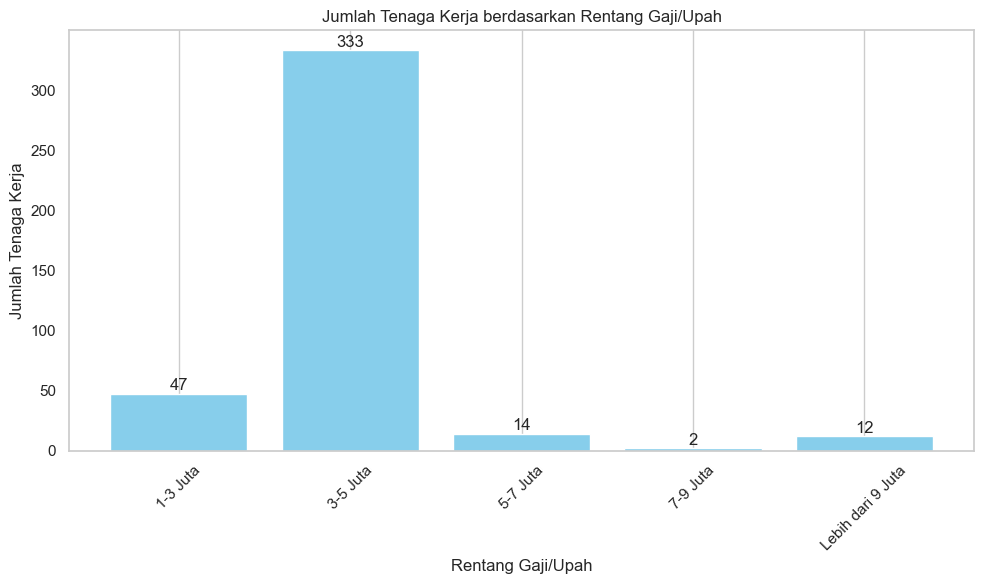

In [19]:
# Kelompokkan data berdasarkan nilai gaji/upah dan hitung jumlah tenaga kerja
count_gaji = data1['GAJI/UPAH'].astype(float)
count_gaji = pd.cut(count_gaji, bins=bins, labels=labels, right=False).value_counts().sort_index()

# Visualisasikan data menggunakan diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(count_gaji.index.astype(str), count_gaji.values, color='skyblue')

# Tambahkan nilai di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Tambahkan judul dan label sumbu
plt.title('Jumlah Tenaga Kerja berdasarkan Rentang Gaji/Upah')
plt.xlabel('Rentang Gaji/Upah')
plt.ylabel('Jumlah Tenaga Kerja')

# Tampilkan plot
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
unique_values = data1['PEND'].unique()
unique_values

array(['S1', 'SLTA', nan, 'SD', 'SLTP', 'D3', 'S2', 'D4'], dtype=object)

In [21]:
df1 = pd.read_excel("data naker.xlsx")

In [ ]:
df1

In [23]:
# Menghapus kolom yang tidak akan digunakan
columns_to_drop = ['NO', 'NIK(KTP)', 'NAMA_PERUSAHAAN', 'ALAMAT_PERUSAHAAN', 'NIB', 'JURUSAN', 'ALAMAT (KTP)', 'KECAMATAN', 'KELURAHAN', 'NO_TLPN', 'JABATAN']
df1.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df1

In [25]:
# Filter variabel
selected_columns = ['SURABAYA/NON_SURABAYA', 'L / P', 'USIA', 'PEND', 'GAJI/UPAH']
df2 = df1[selected_columns]
df2

,SURABAYA/NON_SURABAYA,L / P,USIA,PEND,GAJI/UPAH
0,SURABAYA,L,22.0,S1,4500000.0
1,SURABAYA,L,22.0,S1,4500000.0
2,SURABAYA,L,27.0,S1,4500000.0
3,NON SURABAYA,L,38.0,SLTP,NaN
4,NON SURABAYA,L,26.0,SD,NaN
...,...,...,...,...,...
944,NON SURABAYA,L,37.0,SLTA,NaN
945,NON SURABAYA,L,20.0,SLTA,NaN
946,SURABAYA,L,54.0,SLTA,NaN
947,SURABAYA,L,40.0,S1,NaN


In [26]:
# Membuat salinan dari dataframe untuk diolah
df = df2.copy()

In [27]:
# Menghapus baris yang memiliki nilai NaN di kolom PEND
df.dropna(subset=['PEND'], inplace=True)

# Mengatasi missing values (optional, tergantung kebutuhan)
df['USIA'] = df['USIA'].fillna(df['USIA'].mean())
df['GAJI/UPAH'] = df['GAJI/UPAH'].fillna(df['GAJI/UPAH'].mean())

# Mengatasi missing values untuk kolom kategorikal dengan mode
for column in ['SURABAYA/NON_SURABAYA', 'L / P']:
    df[column] = df[column].fillna(df[column].mode()[0])

In [28]:
df

,SURABAYA/NON_SURABAYA,L / P,USIA,PEND,GAJI/UPAH
0,SURABAYA,L,22.0,S1,4.500000e+06
1,SURABAYA,L,22.0,S1,4.500000e+06
2,SURABAYA,L,27.0,S1,4.500000e+06
3,NON SURABAYA,L,38.0,SLTP,4.061729e+06
4,NON SURABAYA,L,26.0,SD,4.061729e+06
...,...,...,...,...,...
944,NON SURABAYA,L,37.0,SLTA,4.061729e+06
945,NON SURABAYA,L,20.0,SLTA,4.061729e+06
946,SURABAYA,L,54.0,SLTA,4.061729e+06
947,SURABAYA,L,40.0,S1,4.061729e+06


In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah variabel kategorikal menjadi numerik
le_sby = LabelEncoder()
le_lp = LabelEncoder()
le_pend = LabelEncoder()

df['SURABAYA/NON_SURABAYA'] = le_sby.fit_transform(df['SURABAYA/NON_SURABAYA'])
df['L / P'] = le_lp.fit_transform(df['L / P'])
df['PEND'] = le_pend.fit_transform(df['PEND'])

# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['SURABAYA/NON_SURABAYA', 'L / P', 'USIA', 'PEND', 'GAJI/UPAH']])
df_scaled

array([[ 1.11175006, -0.57836584, -1.36694106, -1.33735409,  0.37921481],
       [ 1.11175006, -0.57836584, -1.36694106, -1.33735409,  0.37921481],
       [ 1.11175006, -0.57836584, -0.87549862, -1.33735409,  0.37921481],
       ...,
       [ 1.11175006, -0.57836584,  1.77829057,  0.55862048,  0.        ],
       [ 1.11175006, -0.57836584,  0.40225173, -1.33735409,  0.        ],
       [ 1.11175006, -0.57836584, -0.87549862, -1.33735409,  0.        ]])

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

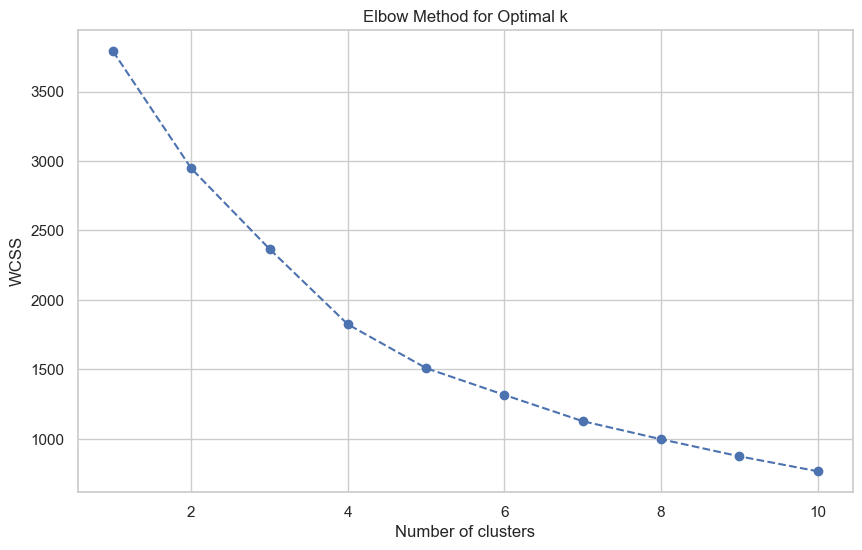

In [30]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

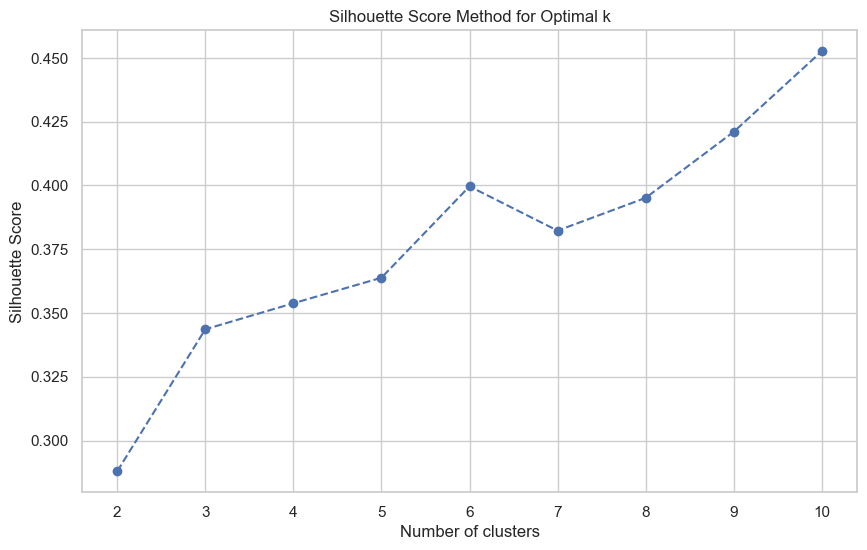

In [31]:
from sklearn.metrics import silhouette_score

# Menentukan jumlah cluster optimal menggunakan Silhouette Score
silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot hasil Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


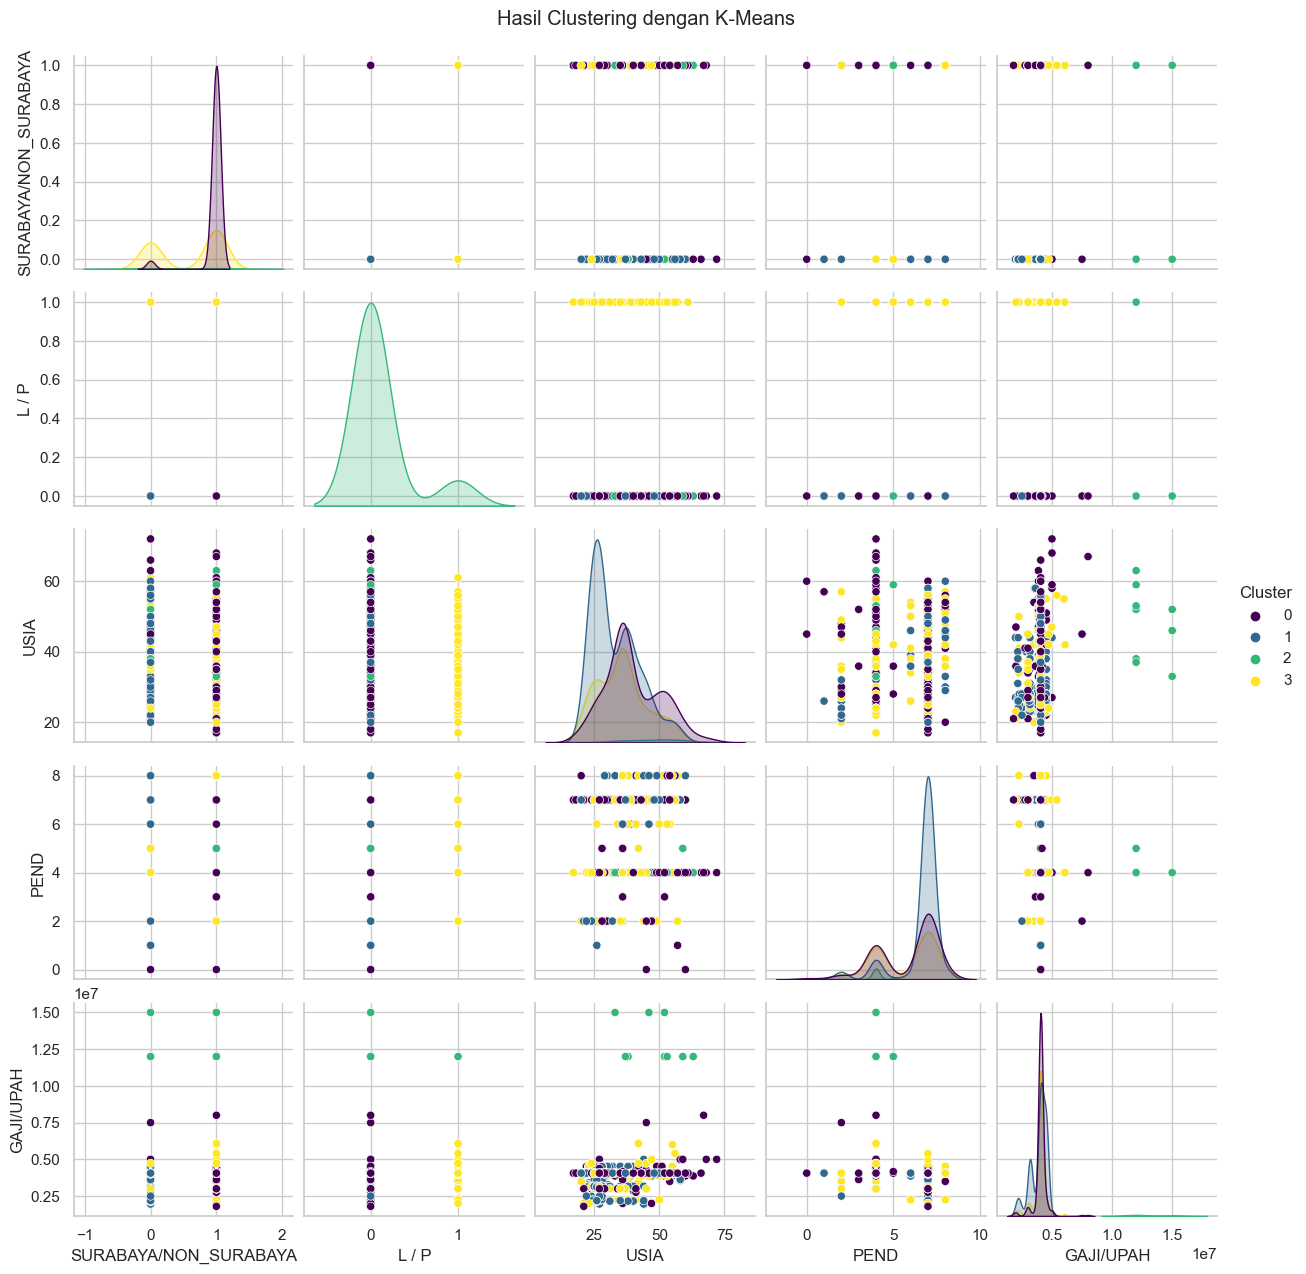

,SURABAYA/NON_SURABAYA,L / P,USIA,PEND,GAJI/UPAH,Cluster
0,1,0,22.0,4,4.500000e+06,0
1,1,0,22.0,4,4.500000e+06,0
2,1,0,27.0,4,4.500000e+06,0
3,0,0,38.0,8,4.061729e+06,1
4,0,0,26.0,6,4.061729e+06,1
...,...,...,...,...,...,...
944,0,0,37.0,7,4.061729e+06,1
945,0,0,20.0,7,4.061729e+06,1
946,1,0,54.0,7,4.061729e+06,0
947,1,0,40.0,4,4.061729e+06,0


In [32]:
from sklearn.cluster import KMeans

# Menggunakan jumlah cluster optimal (misal k = 4 berdasarkan plot Elbow)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Menambahkan hasil clustering ke dataframe asli
df['Cluster'] = clusters

# Visualisasi hasil clustering
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Hasil Clustering dengan K-Means', y=1.02)
plt.savefig('hasil_clustering.png')  # Menyimpan visualisasi sebagai file gambar
plt.show()
# Menampilkan hasil
df

In [33]:
# Menggunakan invers label encoding untuk mengembalikan variabel kategorikal ke bentuk aslinya
decoded_sby = le_sby.inverse_transform(df['SURABAYA/NON_SURABAYA'])
decoded_lp = le_lp.inverse_transform(df['L / P'])
decoded_pend = le_pend.inverse_transform(df['PEND'])

In [34]:
# Simpan DataFrame ke dalam file Excel
df.to_excel('hasil_cluster.xlsx', index=False)

In [35]:
from sklearn.metrics import silhouette_score

# Misalnya, kita memilih jumlah cluster sebagai 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Score:",silhouette_avg)

Silhouette Score: 0.3538062588919716


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [36]:
# Menggunakan invers label encoding untuk mengembalikan variabel kategorikal ke bentuk aslinya
df['SURABAYA/NON_SURABAYA'] = le_sby.inverse_transform(df['SURABAYA/NON_SURABAYA'])
df['L / P'] = le_lp.inverse_transform(df['L / P'])
df['PEND'] = le_pend.inverse_transform(df['PEND'])

In [37]:
df

,SURABAYA/NON_SURABAYA,L / P,USIA,PEND,GAJI/UPAH,Cluster
0,SURABAYA,L,22.0,S1,4.500000e+06,0
1,SURABAYA,L,22.0,S1,4.500000e+06,0
2,SURABAYA,L,27.0,S1,4.500000e+06,0
3,NON SURABAYA,L,38.0,SLTP,4.061729e+06,1
4,NON SURABAYA,L,26.0,SD,4.061729e+06,1
...,...,...,...,...,...,...
944,NON SURABAYA,L,37.0,SLTA,4.061729e+06,1
945,NON SURABAYA,L,20.0,SLTA,4.061729e+06,1
946,SURABAYA,L,54.0,SLTA,4.061729e+06,0
947,SURABAYA,L,40.0,S1,4.061729e+06,0
